# AULA 1

## 1.Alucar-Análise de vendas

In [ ]:
import pandas as pd
alucar=pd.read_csv('alucar.csv')
alucar.sample(5)

,mes,vendas
9,2017-10-31,174
14,2018-03-31,326
13,2018-02-28,293
8,2017-09-30,148
10,2017-11-30,201


In [ ]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
# Converter unidade
alucar.mes=pd.to_datetime(alucar.mes)
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [ ]:
#Bibliotecas de visualização
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


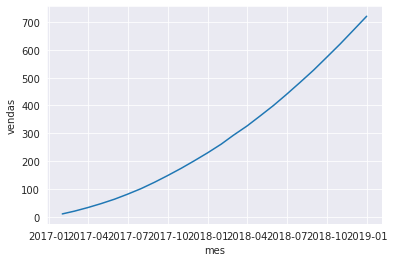

In [ ]:
# Vendas por mês
fig1=sns.lineplot('mes','vendas',data=alucar)

## 2.Melhorar gráficos

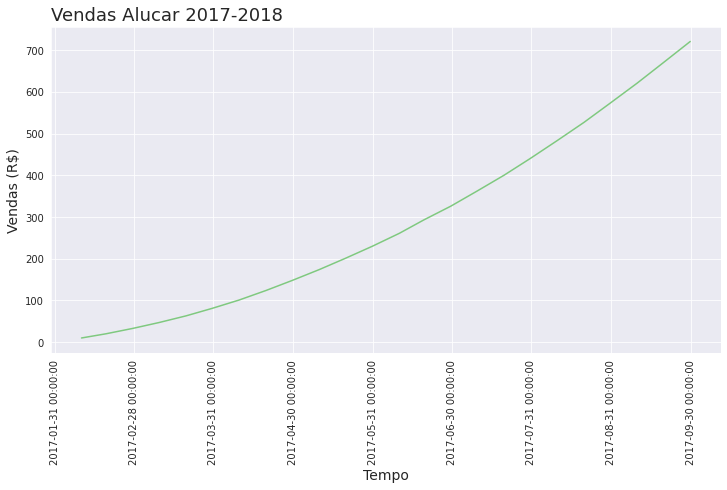

In [ ]:
sns.set_palette('Accent')
sns.set_style("darkgrid")

fig1=sns.lineplot('mes','vendas',data=alucar)

fig1.figure.set_size_inches(12,6)

#Titulo da figura
fig1.set_title('Vendas Alucar 2017-2018',loc='left',fontsize=18)
#Titulo dos eixos
fig1.set_xlabel('Tempo',fontsize=14)
fig1.set_ylabel('Vendas (R$)',fontsize=14)
fig1.set_xticklabels(alucar.mes,rotation=90)
fig1=fig1

# AULA 2

## 1.Decompondo as vendas

In [ ]:
alucar['crescimento']=alucar.vendas.diff()
alucar.head(5)

,mes,vendas,crescimento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


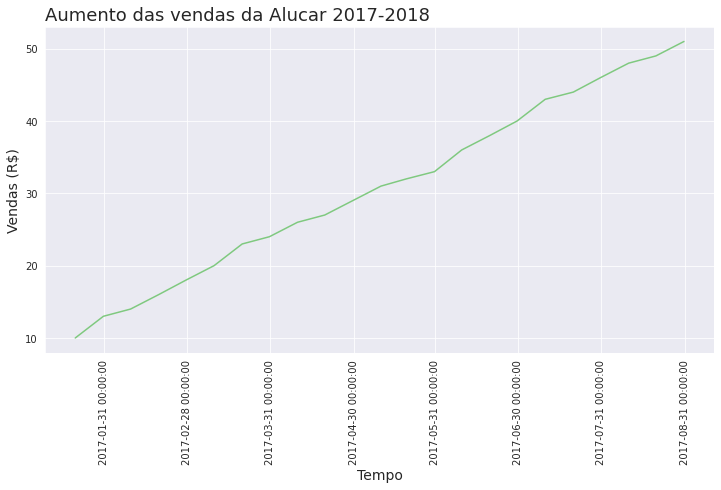

In [ ]:
fig2=sns.lineplot('mes','crescimento',data=alucar)
fig2.figure.set_size_inches(12,6)

#Titulo da figura
fig2.set_title('Aumento das vendas da Alucar 2017-2018',loc='left',fontsize=18)
#Titulo dos eixos
fig2.set_xlabel('Tempo',fontsize=14)
fig2.set_ylabel('Vendas (R$)',fontsize=14)
fig2.set_xticklabels(alucar.mes,rotation=90)
fig2=fig2

In [ ]:
# Função de plotagem 

def plotar(titulo,eixo_x,eixo_y,dados):

  ax=sns.lineplot(x=dados[eixo_x],
                  y=dados[eixo_y],
                  data=dados)
  ax.figure.set_size_inches(12,6)
  #Titulo da figura
  ax.set_title(titulo,loc='left',fontsize=18)
  #Titulo dos eixos
  ax.set_xlabel(eixo_x.upper(),fontsize=12)
  ax.set_ylabel(eixo_y.upper(),fontsize=12)
  ax.set_xticklabels(dados[eixo_x],rotation=45)
  ax=ax


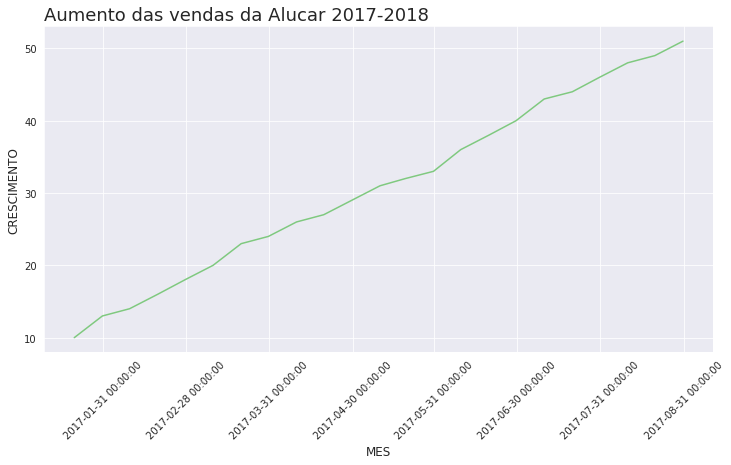

In [ ]:
# Teste
titulo='Aumento das vendas da Alucar 2017-2018'
eixo_x='mes'
eixo_y='crescimento'
dados=alucar
plotar (titulo,eixo_x,eixo_y,dados)

In [ ]:
# Aceleração do crescimento
alucar['aceleracao']=alucar.crescimento.diff()
alucar.head(5)

,mes,vendas,crescimento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


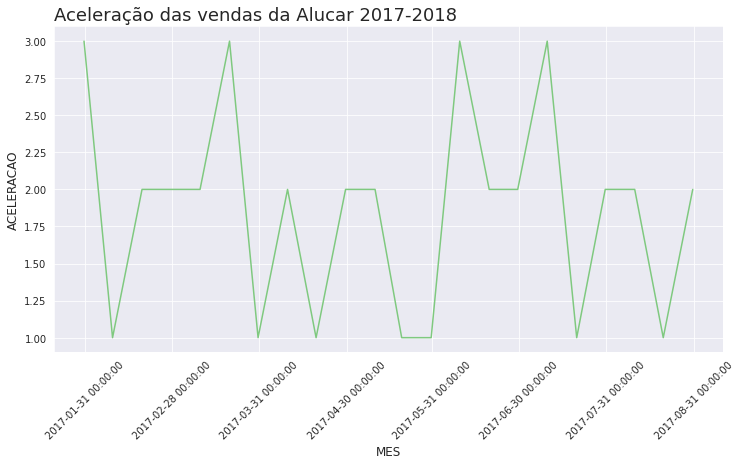

In [ ]:
# Figura 

titulo='Aceleração das vendas da Alucar 2017-2018'
eixo_x='mes'
eixo_y='aceleracao'
dados=alucar
plotar (titulo,eixo_x,eixo_y,dados)

## 2.Observação e tendência

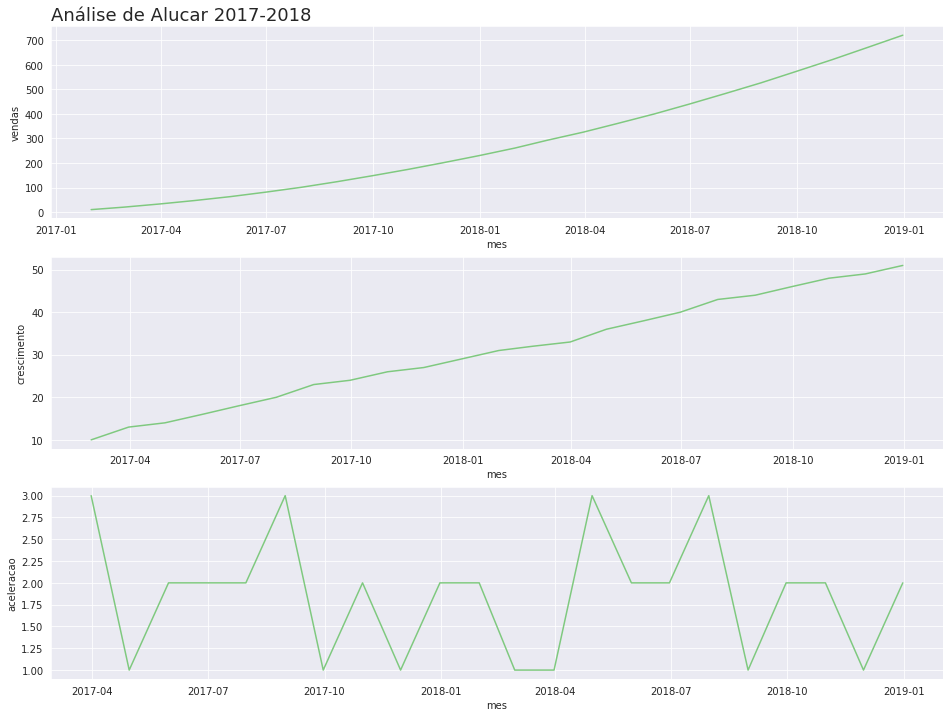

In [ ]:
plt.figure(figsize=(16,12))

ax=plt.subplot(3,1,1)
ax.set_title('Análise de Alucar 2017-2018',fontsize=18,loc='left')
sns.lineplot('mes','vendas',data=alucar)

plt.subplot(3,1,2)
sns.lineplot('mes','crescimento',data=alucar)

plt.subplot(3,1,3)
sns.lineplot('mes','aceleracao',data=alucar)

ax=ax

In [ ]:
# Plot de comparação 

def plotar_comp(x,y1,y2,y3,dados,titulo):
  plt.figure(figsize=(16,12))
  ax=plt.subplot(3,1,1)
  ax.set_title(titulo,fontsize=18,loc='left')
  sns.lineplot(x=x,y=y1,data=dados)
  
  plt.subplot(3,1,2)
  sns.lineplot(x=x,y=y2,data=dados)
 

  plt.subplot(3,1,3)
  sns.lineplot(x=x,y=y3,data=dados)

  ax=ax

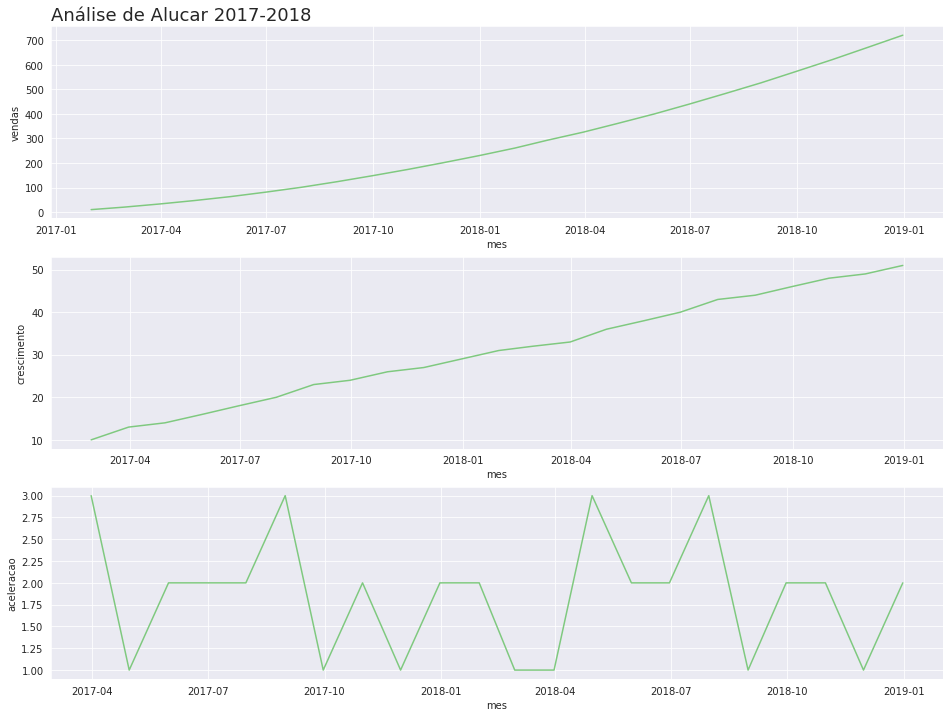

In [ ]:
#Testar

x='mes'
y1='vendas'
y2='crescimento'
y3='aceleracao'
dados=alucar
titulo='Análise de Alucar 2017-2018'
plotar_comp(x,y1,y2,y3,dados,titulo)

##  3.Autocorrelação

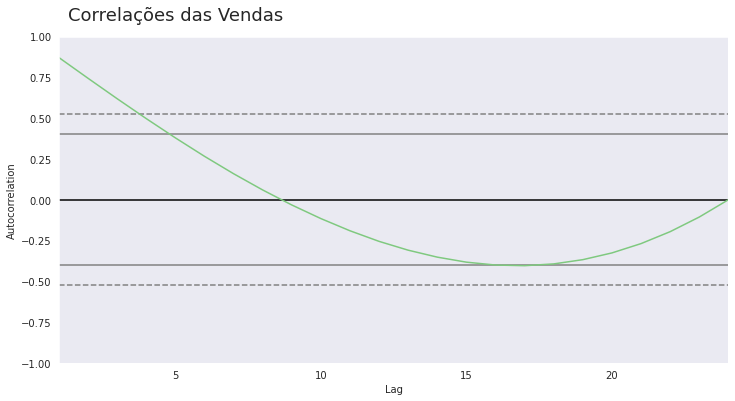

In [ ]:
from pandas.plotting import autocorrelation_plot

ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlações das Vendas',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(alucar.vendas)
ax=ax

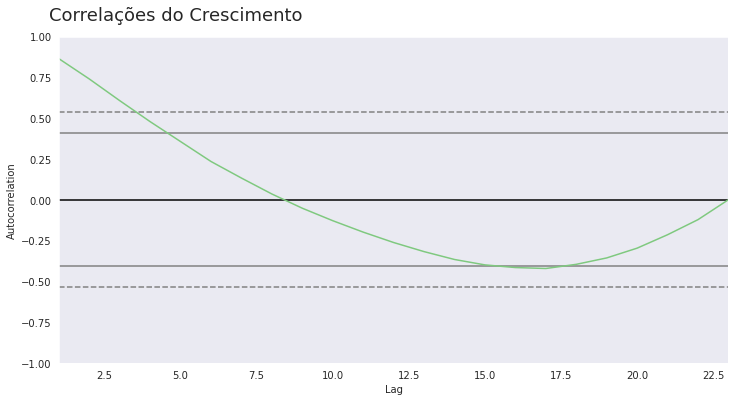

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlações do Crescimento',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(alucar.crescimento[1:])
ax=ax

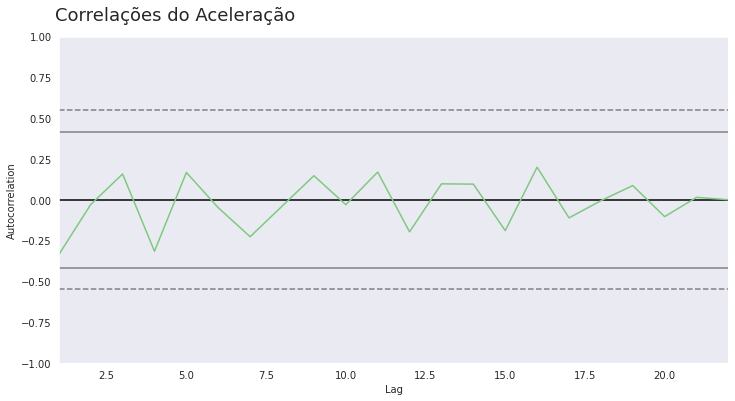

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlações do Aceleração',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(alucar.aceleracao[2:])
ax=ax

# AULA 3

## 1.Analisando assinantes

In [ ]:
assinantes=pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
assinantes.mes=pd.to_datetime(alucar.mes)
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   mes         24 non-null     datetime64[ns]
 1   assinantes  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [ ]:
assinantes['crescimento']=assinantes.assinantes.diff()
assinantes['aceleracao']=assinantes.crescimento.diff()
assinantes.head()

,mes,assinantes,crescimento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


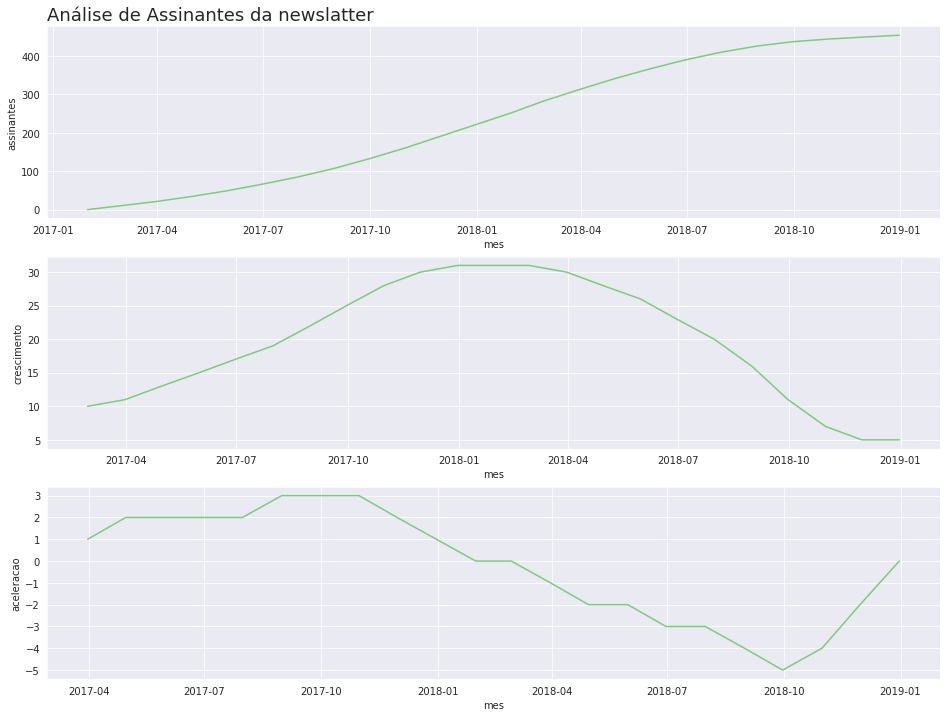

In [ ]:
plotar_comp('mes','assinantes','crescimento','aceleracao',assinantes,'Análise de Assinantes da newslatter')

## 2.Sazonalidade e chocolate

In [ ]:
chocolura=pd.read_csv('chocolura.csv') 
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
chocolura.mes=pd.to_datetime(alucar.mes)
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [ ]:
chocolura['crescimento']=chocolura.vendas.diff()
chocolura['aceleracao']=chocolura.crescimento.diff()
chocolura.head()

,mes,vendas,crescimento,aceleracao
0,2017-01-31,210,NaN,NaN
1,2017-02-28,185,-25.0,NaN
2,2017-03-31,209,24.0,49.0
3,2017-04-30,280,71.0,47.0
4,2017-05-31,211,-69.0,-140.0


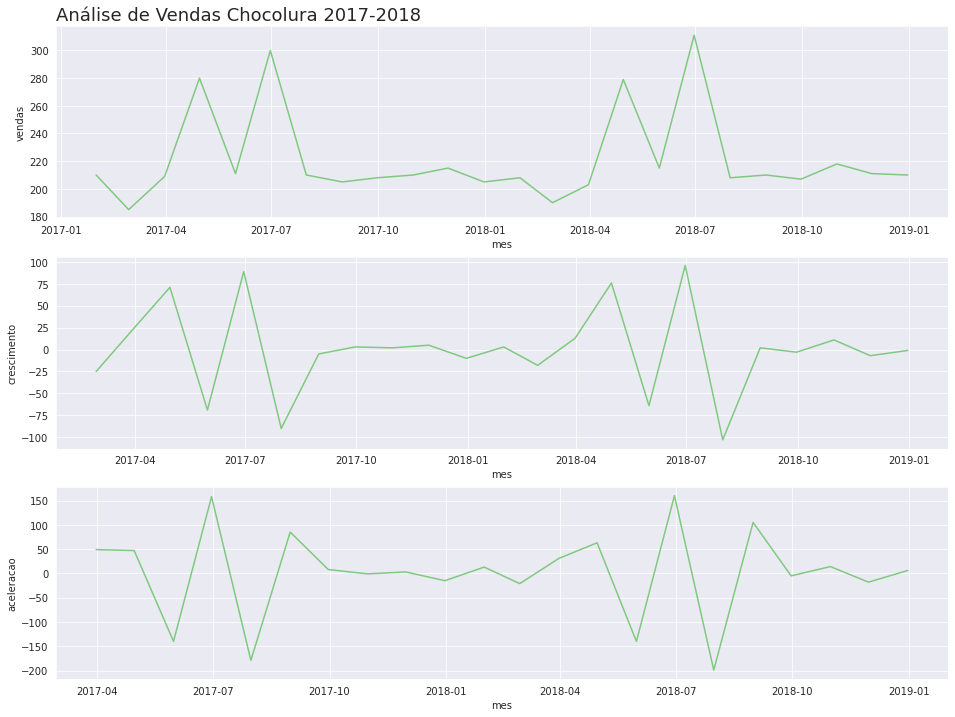

In [ ]:
plotar_comp('mes','vendas','crescimento','aceleracao',chocolura,'Análise de Vendas Chocolura 2017-2018')

## 3.Investigando a sazonalidade

In [ ]:
vendas_por_dia=pd.read_csv('vendas_por_dia.csv') 
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
vendas_por_dia.dia=pd.to_datetime(vendas_por_dia.dia)
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [ ]:
vendas_por_dia['crescimento']=vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao']=vendas_por_dia.crescimento.diff()
vendas_por_dia.head() 

,dia,vendas,crescimento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


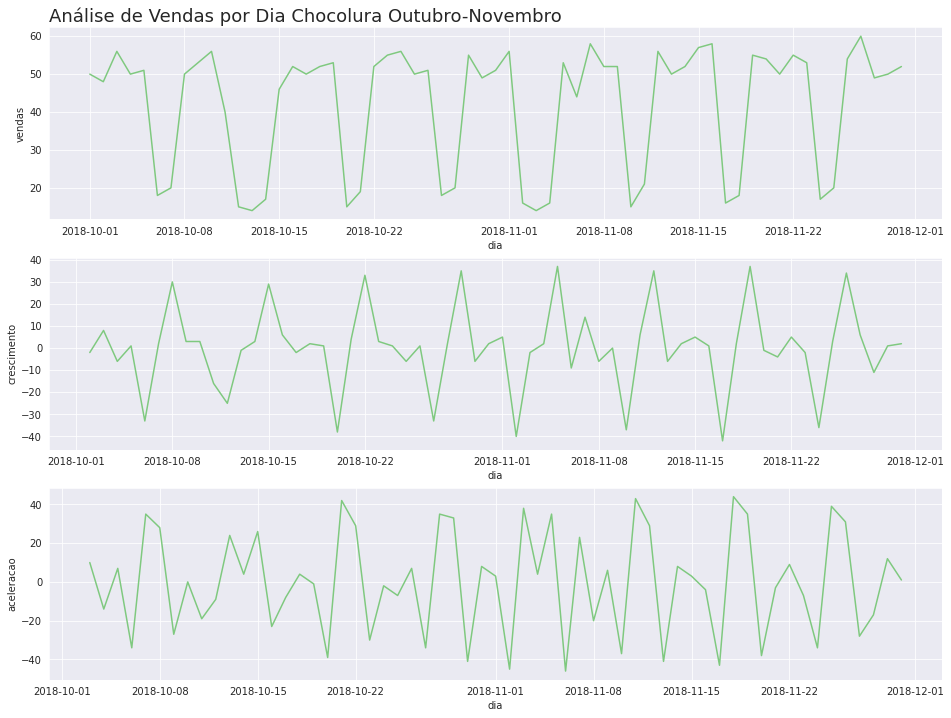

In [ ]:
plotar_comp('dia','vendas','crescimento','aceleracao',vendas_por_dia,'Análise de Vendas por Dia Chocolura Outubro-Novembro')

### 3.1.Analisando a sazionalidade

In [ ]:
vendas_por_dia['dia_da_semana']=vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,crescimento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
trad= {'Monday':'Seg', 'Tuesday':'Ter', 'Wednesday':'Qua', 'Thursday':'Qui', 
       'Friday':'Sex', 'Saturday':'Sab','Sunday':'Dom'}


In [ ]:
vendas_por_dia['dia_da_semana']=vendas_por_dia['dia_da_semana'].map(trad)
vendas_por_dia.head()

,dia,vendas,crescimento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Seg
1,2018-10-02,48,-2.0,NaN,Ter
2,2018-10-03,56,8.0,10.0,Qua
3,2018-10-04,50,-6.0,-14.0,Qui
4,2018-10-05,51,1.0,7.0,Sex


### 3.2.Agrupar por dia

In [ ]:
agrup=round(vendas_por_dia.groupby('dia_da_semana').mean())
agrup

,vendas,crescimento,aceleracao
dia_da_semana,,,
Dom,19.0,3.0,31.0
Qua,53.0,1.0,2.0
Qui,51.0,-2.0,-3.0
Sab,16.0,-28.0,-20.0
Seg,52.0,34.0,31.0
Sex,45.0,-7.0,-5.0
Ter,52.0,-1.0,-34.0


# AULA 4

## 1.Autocorrelação das vendas

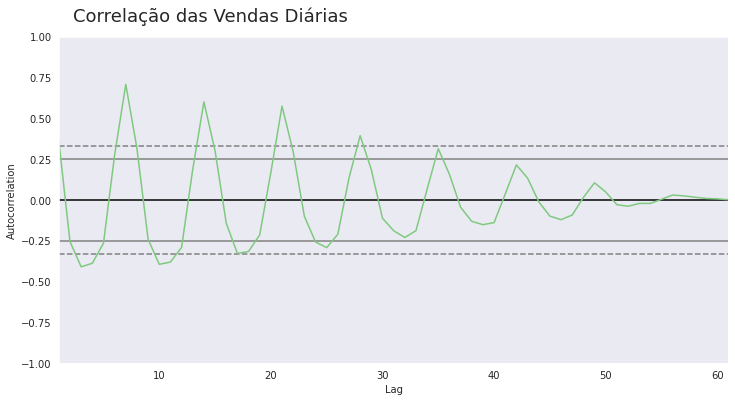

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas Diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia.vendas)
ax=ax

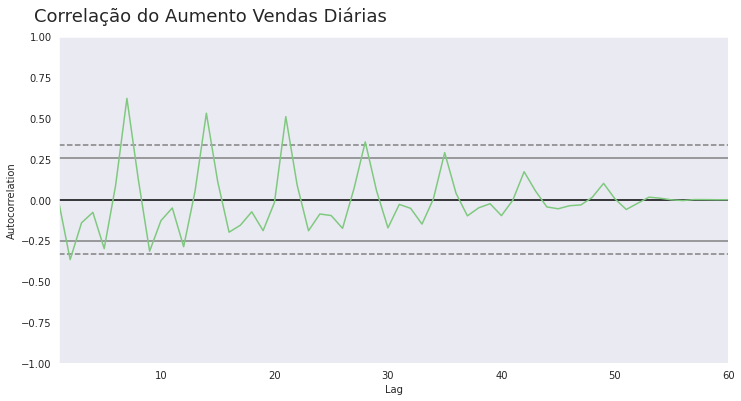

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento Vendas Diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia.crescimento[1:])
ax=ax

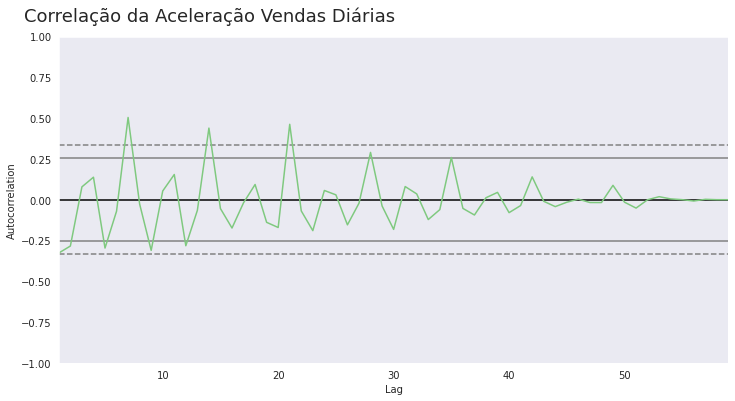

In [ ]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração Vendas Diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia.aceleracao[2:])
ax=ax

## 2.Normalização


In [ ]:
cafelura=pd.read_csv('cafelura.csv') 
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.mes=pd.to_datetime(cafelura.mes)
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [ ]:
cafelura['crescimento']=cafelura.vendas.diff()
cafelura['aceleracao']=cafelura.crescimento.diff()
cafelura.head()

,mes,vendas,crescimento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


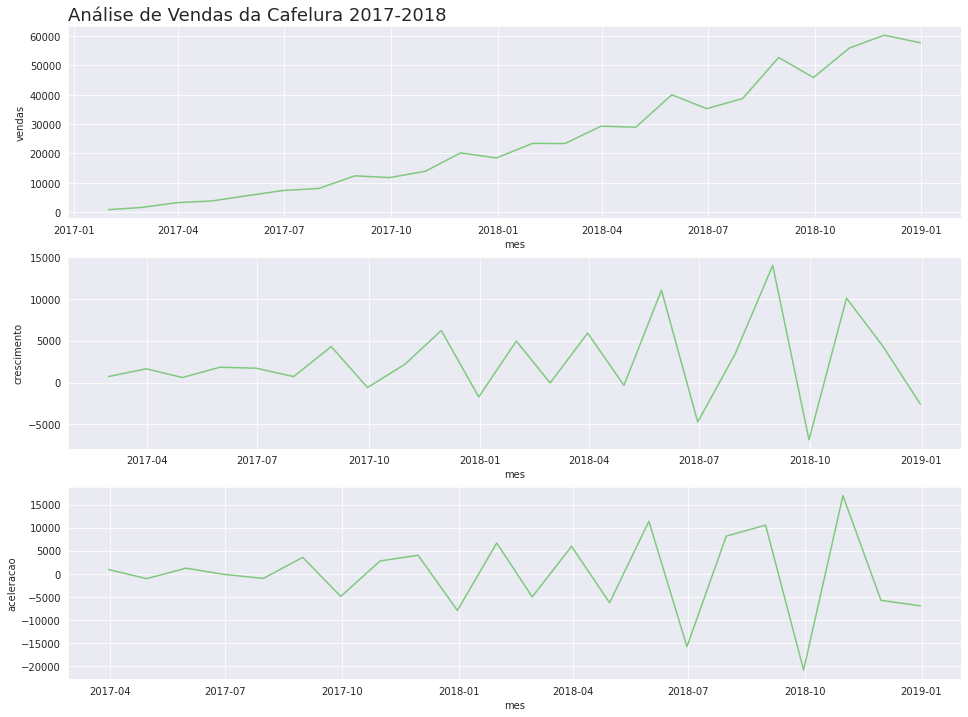

In [ ]:
plotar_comp('mes','vendas','crescimento','aceleracao',cafelura,'Análise de Vendas da Cafelura 2017-2018')

In [ ]:
# Normalizar por dias sem fins de semana
fds=pd.read_csv('dias_final_de_semana.csv')
fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
fds.quantidade_de_dias.value_counts()

8     13
9      6
10     5
Name: quantidade_de_dias, dtype: int64

In [ ]:
cafelura['vendas_norm']=cafelura['vendas']/fds.quantidade_de_dias.values
cafelura.head()

,mes,vendas,crescimento,aceleracao,vendas_norm
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


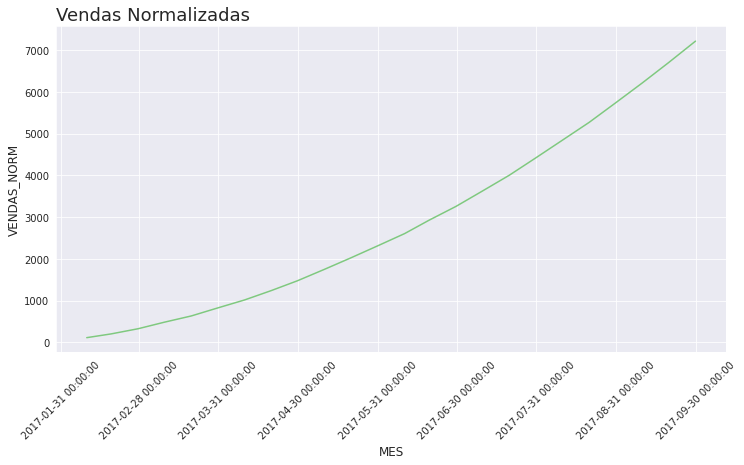

In [ ]:
plotar("Vendas Normalizadas",'mes','vendas_norm',cafelura)

# 3.Statsmodel

In [ ]:
from statsmodels.tsa.seasonal import *

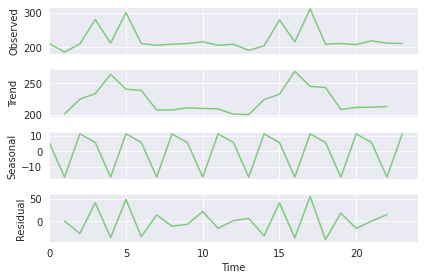

In [ ]:
resultado=seasonal_decompose([chocolura.vendas],freq=3)
ax=resultado.plot()

In [ ]:
observacao=resultado.observed
tendencia=resultado.trend
sazon=resultado.seasonal
ruido=resultado.resid

data= ({'observacao':observacao,'tendencia':tendencia,'sazon':sazon,'ruido':ruido})
resultado=pd.DataFrame(data)
resultado.head()


,observacao,tendencia,sazon,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


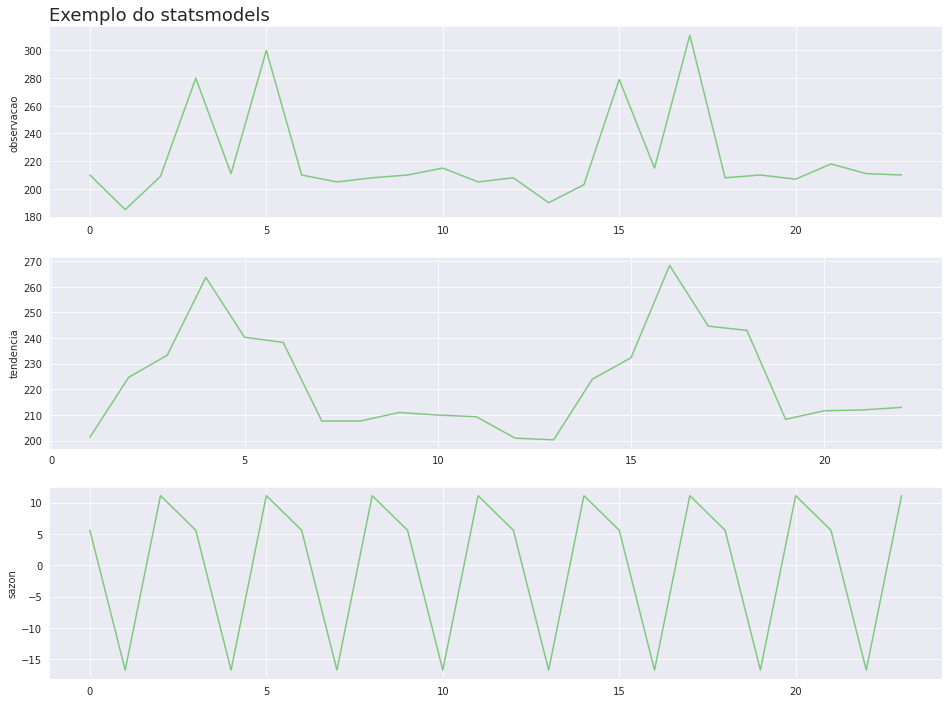

In [ ]:
plotar_comp(resultado.index,
            'observacao','tendencia','sazon',
            resultado,'Exemplo do statsmodels')

# AULA 5

## 1.Ruído de uma time series


In [ ]:
alucel=pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dia=pd.to_datetime(alucel.dia)
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [ ]:
alucel['crescimento']=alucel.vendas.diff()
alucel['aceleracao']=alucel.crescimento.diff()
alucel.head()

,dia,vendas,crescimento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


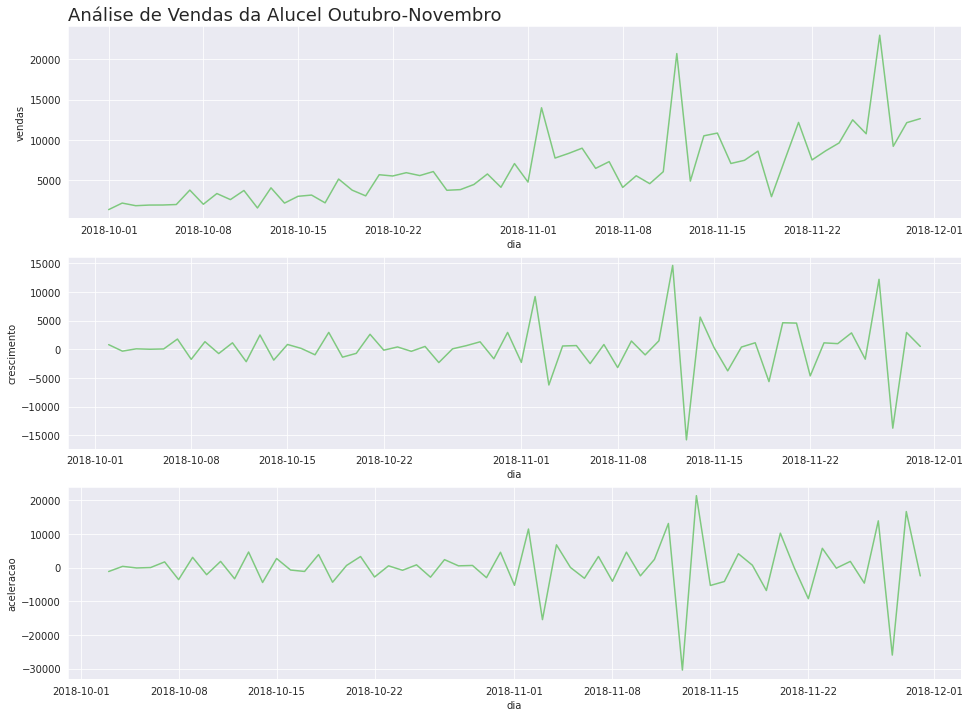

In [ ]:
plotar_comp('dia','vendas','crescimento','aceleracao',alucel,'Análise de Vendas da Alucel Outubro-Novembro')

## 2.Média móvel

In [ ]:
alucel['media_movel']=alucel.vendas.rolling(30).mean()
alucel.head(7)

,dia,vendas,crescimento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,NaN


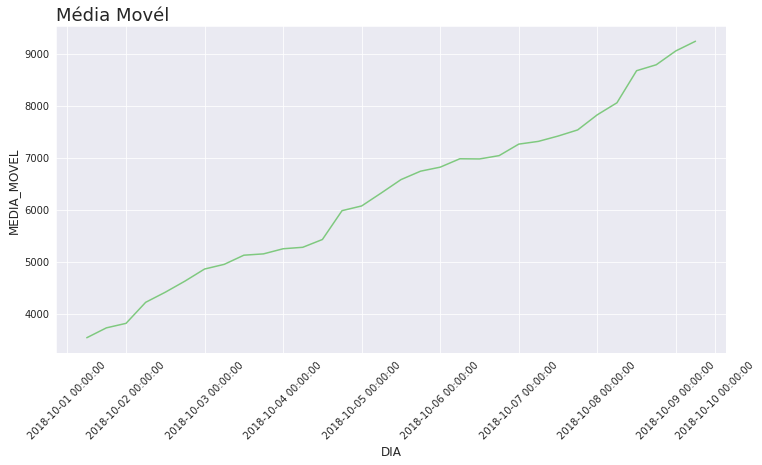

In [ ]:
plotar('Média Movél','dia','media_movel',alucel)

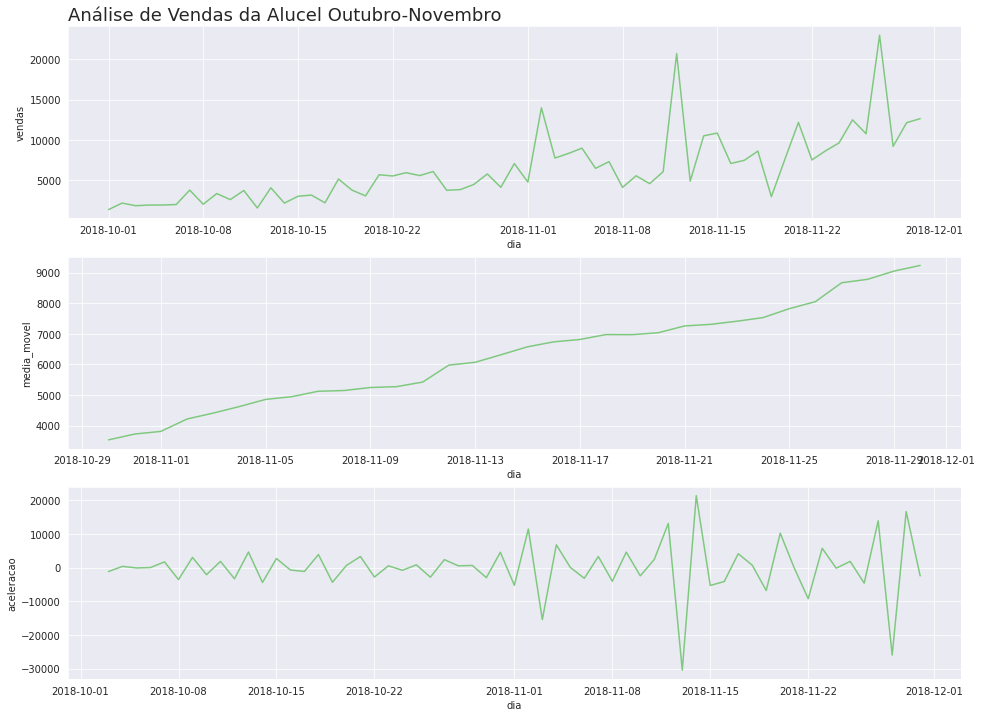

In [ ]:
plotar_comp('dia','vendas','media_movel','aceleracao',alucel,'Análise de Vendas da Alucel Outubro-Novembro')